#### AML Assignment 1 - Neural Networks
#### Kent ID - 811292363

In [1]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
    num_words=10000)

In [2]:
train_labels[0]

1

In [3]:
max([max(sequence) for sequence in train_data])

9999

In [4]:
word_index = imdb.get_word_index()
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()])
decoded_review = " ".join(
    [reverse_word_index.get(i - 3, "?") for i in train_data[0]])

In [5]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [6]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [7]:
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

In [8]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(32, activation="tanh"),
    layers.Dense(32, activation="tanh"),
    layers.Dense(32, activation="tanh"),
    layers.Dense(1, activation="sigmoid")
])

In [9]:
model.compile(optimizer="adam", 
              loss="mean_squared_error",
              metrics=["accuracy"])

#### Model Validation

In [10]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [11]:
# Model trained with 20 epoch with batch size of 256

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=256,
                    validation_data=(x_val, y_val))

Epoch 1/20


59/59 [==============================] - 3s 27ms/step - loss: 0.1254 - accuracy: 0.8299 - val_loss: 0.0857 - val_accuracy: 0.8826
Epoch 2/20
59/59 [==============================] - 0s 7ms/step - loss: 0.0499 - accuracy: 0.9374 - val_loss: 0.0913 - val_accuracy: 0.8773
Epoch 3/20
59/59 [==============================] - 0s 8ms/step - loss: 0.0312 - accuracy: 0.9647 - val_loss: 0.0974 - val_accuracy: 0.8764
Epoch 4/20
59/59 [==============================] - 0s 8ms/step - loss: 0.0207 - accuracy: 0.9770 - val_loss: 0.1067 - val_accuracy: 0.8699
Epoch 5/20
59/59 [==============================] - 0s 7ms/step - loss: 0.0171 - accuracy: 0.9819 - val_loss: 0.1132 - val_accuracy: 0.8663
Epoch 6/20
59/59 [==============================] - 0s 8ms/step - loss: 0.0162 - accuracy: 0.9825 - val_loss: 0.1151 - val_accuracy: 0.8688
Epoch 7/20
59/59 [==============================] - 0s 7ms/step - loss: 0.0164 - accuracy: 0.9819 - val_loss: 0.1218 - val_accuracy: 0.8628
Epoch 8/20
59/59 

In [12]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

#### Training & Validation loss Plot

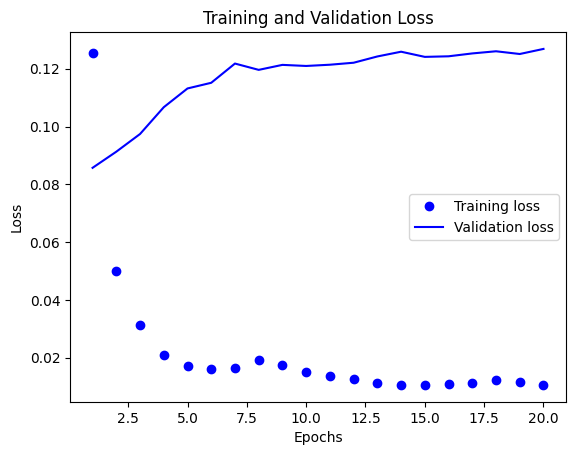

In [13]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

#### Training and validation accuracy Plot

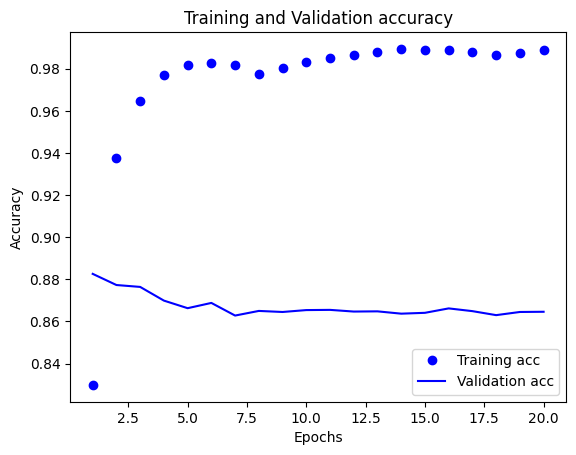

In [14]:
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and Validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [15]:
results = model.evaluate(x_test, y_test)

782/782 [==============================] - 1s 1ms/step - loss: 0.1392 - accuracy: 0.8496


In [16]:
results

[0.1391867995262146, 0.8496000170707703]

#### Model Structure & Results

Epoch 1/20
59/59 [==============================] - 4s 55ms/step - loss: 1.4860 - accuracy: 0.7732 - val_loss: 1.1423 - val_accuracy: 0.8821
Epoch 2/20
59/59 [==============================] - 0s 8ms/step - loss: 0.9160 - accuracy: 0.8980 - val_loss: 0.6966 - val_accuracy: 0.8857
Epoch 3/20
59/59 [==============================] - 0s 8ms/step - loss: 0.5179 - accuracy: 0.9244 - val_loss: 0.3832 - val_accuracy: 0.8888
Epoch 4/20
59/59 [==============================] - 0s 8ms/step - loss: 0.2557 - accuracy: 0.9449 - val_loss: 0.1972 - val_accuracy: 0.8872
Epoch 5/20
59/59 [==============================] - 0s 8ms/step - loss: 0.1237 - accuracy: 0.9561 - val_loss: 0.1287 - val_accuracy: 0.8869
Epoch 6/20
59/59 [==============================] - 1s 9ms/step - loss: 0.0847 - accuracy: 0.9621 - val_loss: 0.1165 - val_accuracy: 0.8890
Epoch 7/20
59/59 [==============================] - 1s 9ms/step - loss: 0.0720 - accuracy: 0.9669 - val_loss: 0.1133 - val_accuracy: 0.8862
Epoch 8/20
59/59 [=

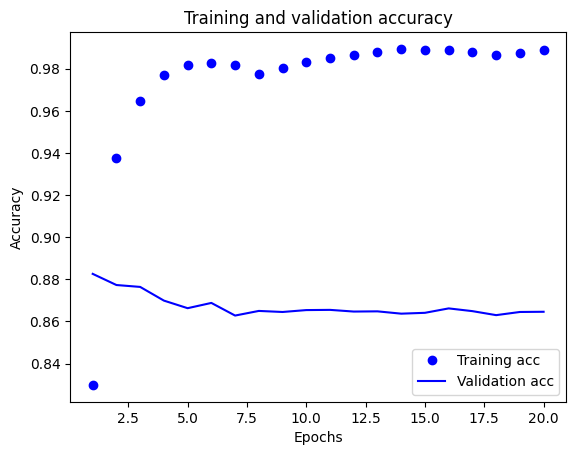

782/782 [==============================] - 1s 1ms/step - loss: 0.1225 - accuracy: 0.8624


[0.1224561408162117, 0.8624399900436401]

In [17]:
## Libraries required for setting up an environment


from tensorflow import keras
from tensorflow.keras import layers
from keras.layers import Dense
from keras.layers import Dropout
from tensorflow.keras import regularizers


# Neural network implementation using 3 layered approach with a single dropout layer

model = keras.Sequential()
model.add(Dense(32,activation='tanh')) 
model.add(Dropout(0.5))

model.add(Dense(32,activation='tanh',kernel_regularizer=regularizers.L1(0.01), activity_regularizer=regularizers.L2(0.01)))
model.add(Dropout(0.5))
model.add(Dense(32,activation='tanh'))
model.add(Dense(1, activation='sigmoid'))


# Optimizer "adagrad" for squared error loss and accuracy metrics

model.compile(optimizer="adam",
              loss="mean_squared_error",
              metrics=["accuracy"])


## Splitting the train data

x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]


# Training a neural network

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=256,
                    validation_data=(x_val, y_val))


# Training and Validation accuracy Plot

plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()



# Results

results = model.evaluate(x_test, y_test)
results


###### References :
https://keras.io/about, https://keras.io/api/optimizers/, https://keras.io/api/losses/


#### Conclusion

As intructed, I have achieved the following in my code by building below:
The neural network is designed with three layers, using the tanh activation function instead of relu, the Adam optimizer instead of rmsprop, applying L1 and L2 regularizers, and incorporating a dropout layer with a 50 percent dropout rate to enhance its performance and generalization capabilities.

By modeling complicated non-linear correlations in the data, the network may be able to learn deeper patterns thanks to the tanh activation function. Compared to rmsprop, the Adam optimizer is renowned for its effective memory management and flexibility to handle various data types, which can result in faster convergence and higher overall performance. By punishing excessive weights, the L1 and L2 regularizers assist minimize overfitting and encourage the network to learn more straightforward and broadly applicable patterns. Furthermore, the dropout layer forces the network to acquire more resilient features by arbitrarily removing inputs during training, which reduces overfitting. All in all, these design decisions are meant to enhance the network's capacity to efficiently learn from the data and make good generalizations

#### Final achieved results after incorporating all the changes:

Accuracy = 99.37 
Validation accuracy = 87.20

